In [261]:
'''
I am importing all the libraries I will be using in this project
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet, LogisticRegression, QuantileRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
'''
I am uploading my data file and reading it into a pandas dataframe
'''
#from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('House_Price_Prediction.csv')

Saving House_Price_Prediction.csv to House_Price_Prediction.csv


In [204]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,0,42000,8.674197,3.0,1,2,1,1,0,1,0,0,0
1,1,38500,8.294050,2.0,1,1,0,1,0,0,0,0,0
2,2,49500,8.026170,3.0,1,1,0,1,0,0,0,0,0
3,3,60500,8.802372,3.0,1,2,0,1,1,0,0,0,0
4,4,61000,8.757784,3.0,1,1,0,1,0,0,0,0,0


In [205]:
'''
Before Analysis, we need to prepare the data and preprocess it by checking
for the errors, outliers, null input etc as well as conducting the feature Engineering
'''
#drop the unnamed column as it is not needed
df.drop('Unnamed: 0', axis=1, inplace=True)

In [206]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000,8.674197,3.0,1,2,1,1,0,1,0,0,0
1,38500,8.294050,2.0,1,1,0,1,0,0,0,0,0
2,49500,8.026170,3.0,1,1,0,1,0,0,0,0,0
3,60500,8.802372,3.0,1,2,0,1,1,0,0,0,0
4,61000,8.757784,3.0,1,1,0,1,0,0,0,0,0


In [207]:
#Check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         551 non-null    int64  
 1   lotsize       551 non-null    float64
 2   bedrooms      551 non-null    float64
 3   bathrms       551 non-null    int64  
 4   stories       551 non-null    int64  
 5   garagepl      551 non-null    int64  
 6   driveway_yes  551 non-null    int64  
 7   recroom_yes   551 non-null    int64  
 8   fullbase_yes  551 non-null    int64  
 9   gashw_yes     551 non-null    int64  
 10  airco_yes     551 non-null    int64  
 11  prefarea_yes  551 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 51.8 KB


In [208]:
#Checking the outliers and NA of the varables
df.isnull().sum()

,0
price,0
lotsize,0
bedrooms,0
bathrms,0
stories,0
garagepl,0
driveway_yes,0
recroom_yes,0
fullbase_yes,0
gashw_yes,0


In [209]:
df[['price',
'lotsize',
'bedrooms',
'bathrms',
'stories']].describe()

,price,lotsize,bedrooms,bathrms,stories
count,551.000000,551.000000,551.000000,551.000000,551.000000
mean,68445.811252,8.470413,2.967332,1.286751,1.820327
std,26848.486040,0.399086,0.732880,0.502165,0.881334
min,25000.000000,7.408531,1.000000,1.000000,1.000000
25%,49500.000000,8.188689,3.000000,1.000000,1.000000
50%,62500.000000,8.433812,3.000000,1.000000,2.000000
75%,82950.000000,8.757784,3.000000,2.000000,2.000000
max,190000.000000,9.692767,6.000000,4.000000,4.000000


In [210]:
print(df.bedrooms.value_counts())
print(df.bathrms.value_counts())
print(df.stories.value_counts())

bedrooms
3.0    307
2.0    135
4.0     95
5.0     10
1.0      2
6.0      2
Name: count, dtype: int64
bathrms
1    405
2    135
3     10
4      1
Name: count, dtype: int64
stories
2    238
1    228
4     44
3     41
Name: count, dtype: int64


In [211]:
#Checking the outliers with quantiles Method
List = ['price','lotsize', 'bathrms','stories']

for i in List:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # if lower_limit < 0:#Checking the outliers with quantiles


  if lower_limit < 0:
    lower_limit = 0
  df[i] = np.where(df[i] < lower_limit, lower_limit, df[i])
  df[i] = np.where(df[i] > upper_limit, upper_limit, df[i])
  index_list = df.index[ (df[i] < lower_limit) | (df[i] > upper_limit) ]
  #print(i,np.round(lower_limit,2), np.round(upper_limit,2), len(index_list))

  '''
  I am replacing the outliers with quantiles method as it improves the performance
  of my model by doing so
  '''


In [212]:
#Checking the outliers with mean and STD Method
# List = ['price','lotsize', 'bathrms','stories']

# for i in List:

#   upper_limit = df[i].mean() + 3*df[i].std()
#   lower_limit = df[i].mean() - 3*df[i].std()

#   # if lower_limit < 0:#Checking the outliers with quantiles


#   if lower_limit < 0:
#     lower_limit = 0
#   df[i] = np.where(df[i] < lower_limit, lower_limit, df[i])
#   df[i] = np.where(df[i] > upper_limit, upper_limit, df[i])
#   index_list = df.index[ (df[i] < lower_limit) | (df[i] > upper_limit) ]
#   print(i,np.round(lower_limit,2), np.round(upper_limit,2), len(index_list))


In [213]:
df[['price',
'lotsize',
'bedrooms',
'bathrms',
'stories']].describe()

,price,lotsize,bedrooms,bathrms,stories
count,551.000000,551.000000,551.000000,551.000000,551.000000
mean,67929.840290,8.470186,2.967332,1.285844,1.780399
std,25199.181324,0.398417,0.732880,0.497685,0.787895
min,25000.000000,7.408531,1.000000,1.000000,1.000000
25%,49500.000000,8.188689,3.000000,1.000000,1.000000
50%,62500.000000,8.433812,3.000000,1.000000,2.000000
75%,82950.000000,8.757784,3.000000,2.000000,2.000000
max,133125.000000,9.611425,6.000000,3.500000,3.500000


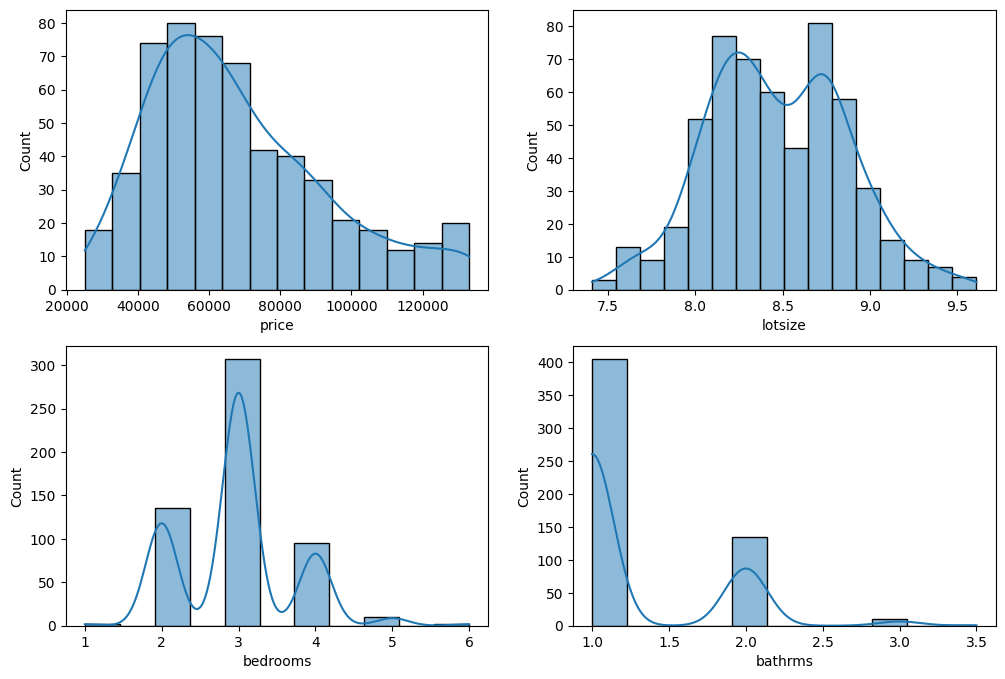

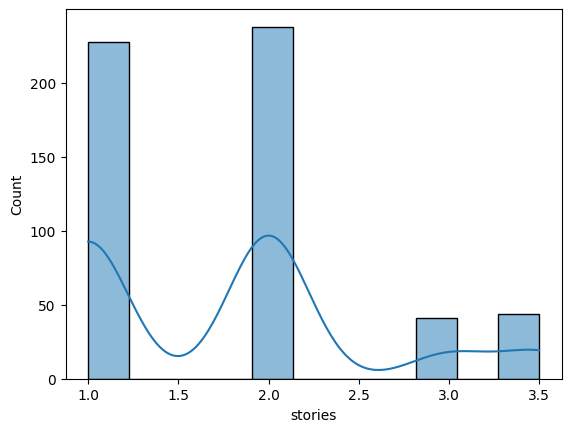

In [214]:
#Checking the distribution and the Skewness of the numeric variables
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(x= "price", data = df, kde = True)
plt.subplot(2,2,2)
sns.histplot(x= "lotsize", data = df, kde = True)
plt.subplot(2,2,3)
sns.histplot(x= "bedrooms", data = df, kde = True)
plt.subplot(2,2,4)
sns.histplot(x= "bathrms", data = df, kde = True)
plt.show()
sns.histplot(x= "stories", data = df, kde = True)
plt.show()


In [215]:
# I tried to investigate the skewness and see if there will be a need for any transformation
df[['price',
'lotsize',
'bedrooms',
'bathrms',
'stories']].skew()

,0
price,0.799893
lotsize,0.120808
bedrooms,0.495887
bathrms,1.494154
stories,0.717332


In [216]:

''''
As we can see from the plots and skewness, Price, bathrms and Stories are positively skewed
I then applied logarithmic transformation to these variables
'''
df['logprice'] = np.log(df['price'])
df['logbathrms'] = np.log(df['bathrms'])
df['logstories'] = np.log(df['stories'])

df[['logprice',
'logbathrms',
'logstories']].skew()

,0
logprice,0.007509
logbathrms,1.207374
logstories,0.146482


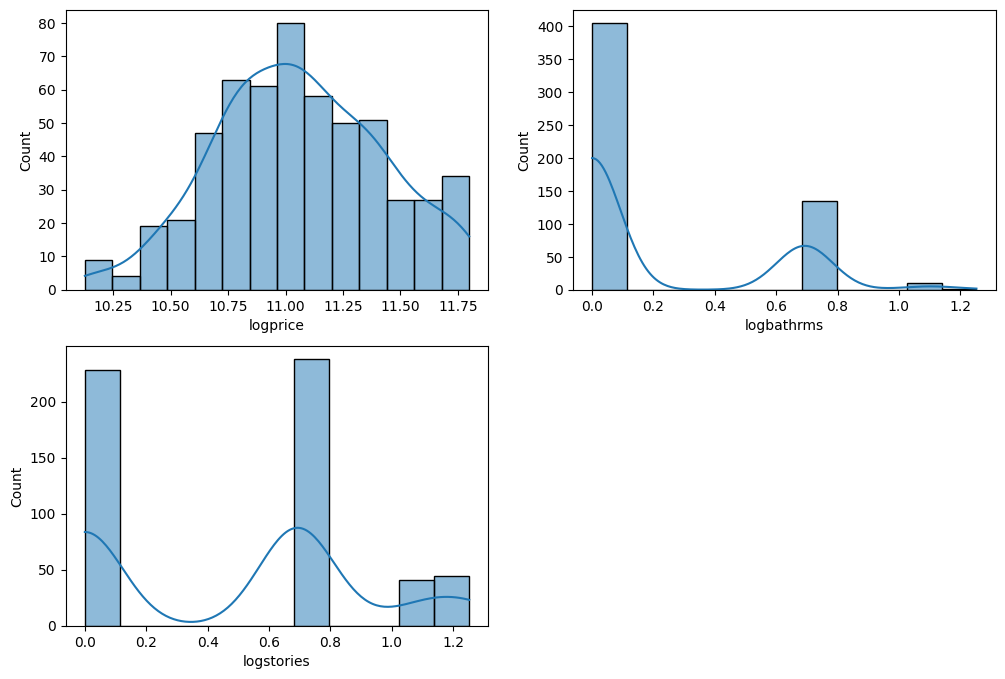

In [217]:
#Checking the distribution after logarithmic transformation
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(x= "logprice", data = df, kde = True)
plt.subplot(2,2,2)
sns.histplot(x= "logbathrms", data = df, kde = True)
plt.subplot(2,2,3)
sns.histplot(x= "logstories", data = df, kde = True)
plt.show()

In [218]:
# Checking the correlation of the indepedent features with the target

print("Checking correlation with Price:")
print(np.abs(df.drop(['price','logprice'], axis =1).corrwith(df['price'])).sort_values(ascending= False))
print("Checking correlation with logPrice:")
print(np.abs(df.drop(['price','logprice'], axis =1).corrwith(df['logprice'])).sort_values(ascending= False))

Checking correlation with Price:
lotsize         0.567744
logbathrms      0.508203
bathrms         0.504351
airco_yes       0.472032
stories         0.430530
logstories      0.393038
garagepl        0.375666
bedrooms        0.364578
prefarea_yes    0.317456
driveway_yes    0.310159
recroom_yes     0.270354
fullbase_yes    0.178032
gashw_yes       0.097774
dtype: float64
Checking correlation with logPrice:
lotsize         0.578886
logbathrms      0.480768
bathrms         0.473707
airco_yes       0.464734
stories         0.417231
logstories      0.382654
bedrooms        0.365262
garagepl        0.365043
driveway_yes    0.335380
prefarea_yes    0.327016
recroom_yes     0.280434
fullbase_yes    0.206933
gashw_yes       0.088358
dtype: float64


In [219]:
'''
 I will be dropping the logarithmic transformation as it didn't have any significant improvement on the performance.
 neither does it improve the correlation with the outcome variables
 I will also be testing with an estimator like Huber Regressor which is robust to outliers and skewness
'''
df.drop(['logprice', 'logbathrms', 'logstories'] , axis =1, inplace=True)
#df.drop(['price', 'lotsize', 'bathrms', 'stories'] , axis =1, inplace=True)

In [220]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,8.674197,3.0,1.0,2.0,1,1,0,1,0,0,0
1,38500.0,8.294050,2.0,1.0,1.0,0,1,0,0,0,0,0
2,49500.0,8.026170,3.0,1.0,1.0,0,1,0,0,0,0,0
3,60500.0,8.802372,3.0,1.0,2.0,0,1,1,0,0,0,0
4,61000.0,8.757784,3.0,1.0,1.0,0,1,0,0,0,0,0


In [221]:
# Selecting my best features
corr = print(np.abs(df.drop('price', axis =1).corrwith(df['price'])).sort_values(ascending= False))
selected_features= np.abs(df.drop('price', axis =1).corrwith(df['price'])).sort_values(ascending= False).head(7).index.tolist()
print(corr)
print("Selected Features:", selected_features)

lotsize         0.567744
bathrms         0.504351
airco_yes       0.472032
stories         0.430530
garagepl        0.375666
bedrooms        0.364578
prefarea_yes    0.317456
driveway_yes    0.310159
recroom_yes     0.270354
fullbase_yes    0.178032
gashw_yes       0.097774
dtype: float64
None
Selected Features: ['lotsize', 'bathrms', 'airco_yes', 'stories', 'garagepl', 'bedrooms', 'prefarea_yes']


In [222]:
indcorr = df[selected_features].corr()

In [223]:
#Checking correlation among the independent features to eliminate mulit-collineairty among features
indcorr.style.background_gradient(cmap='coolwarm')

,lotsize,bathrms,airco_yes,stories,garagepl,bedrooms,prefarea_yes
lotsize,1.000000,0.196864,0.262623,0.088401,0.366431,0.151030,0.213026
bathrms,0.196864,1.000000,0.186861,0.312226,0.166927,0.372093,0.064062
airco_yes,0.262623,0.186861,1.000000,0.295602,0.159165,0.158087,0.109357
stories,0.088401,0.312226,0.295602,1.000000,0.034870,0.422079,0.041541
garagepl,0.366431,0.166927,0.159165,0.034870,1.000000,0.136709,0.087499
bedrooms,0.151030,0.372093,0.158087,0.422079,0.136709,1.000000,0.077366
prefarea_yes,0.213026,0.064062,0.109357,0.041541,0.087499,0.077366,1.000000


In [224]:
'''
As we can see from the above cmap, we don't have any muilticollinear features
As a result we will be sticking to our selected features in building our models
We will split our data frame into X and y
'''

X = df[selected_features]
y = df['price']


In [225]:
'''
As we are testing our model with various regression model in order for us to select the best performimg model
Ploynomial regression is one of the estinators we will be testing, hence we need to transform and define polynomial features
'''
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
X_poly

array([[1.        , 8.67419694, 1.        , ..., 9.        , 0.        ,
        0.        ],
       [1.        , 8.29404964, 1.        , ..., 4.        , 0.        ,
        0.        ],
       [1.        , 8.02617019, 1.        , ..., 9.        , 0.        ,
        0.        ],
       ...,
       [1.        , 8.69951475, 1.        , ..., 9.        , 0.        ,
        0.        ],
       [1.        , 8.85366543, 1.        , ..., 9.        , 0.        ,
        0.        ],
       [1.        , 9.46498259, 1.        , ..., 9.        , 0.        ,
        0.        ]])

**Task 1:**

**•	Analyse the dataset and perform the steps below to build linear regression machine learning model.**
1.	Data Splitting – Split the data into training and testing datasets.
2.	Build the linear regression model using training dataset
3.	Make predictions using the built model on test dataset.
4.	Evaluate model using appropriate evaluation metrics. [MAE, RMSE, R-SQUARED SCORE]
•	Add Python comments to explain your code blocks.



In [226]:
''''
Task 1: Q1. Data Splitting – Split the data into training and testing datasets.
'''
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(495, 7) (56, 7) (495,) (56,)


In [227]:
'''
We will be applying scaling on our data, here I'm using Robust Scaler as it is robust
to the presence of outliers
'''

Scaler = RobustScaler()
X_train = pd.DataFrame(Scaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(Scaler.transform(X_test), columns= X_test.columns)
print(X_train.head())
print(X_test.head())

    lotsize  bathrms  airco_yes  stories  garagepl  bedrooms  prefarea_yes
0  0.562819      0.0        1.0     -1.0       0.0       0.0           1.0
1 -0.015007      1.0        1.0     -1.0       2.0      -1.0           0.0
2 -0.430282      0.0        0.0     -1.0       0.0      -1.0           0.0
3  0.462791      0.0        0.0     -1.0       0.0       0.0           0.0
4  0.900308      1.0        0.0      0.0       0.0       0.0           1.0
    lotsize  bathrms  airco_yes  stories  garagepl  bedrooms  prefarea_yes
0  0.445544      1.0        1.0      1.5       1.0       0.0           0.0
1 -0.622510      0.0        0.0     -1.0       1.0      -1.0           0.0
2 -0.755909      0.0        0.0      0.0       0.0       0.0           0.0
3  0.546543      0.0        1.0     -1.0       1.0      -1.0           0.0
4  0.094503      0.0        0.0      0.0       0.0      -1.0           0.0


In [228]:
'''
Here I am applying spliting for the polynomial features
'''

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.1, random_state=42)
print(X_train_poly.shape, X_test_poly.shape, y_train_poly.shape, y_test_poly.shape)

(495, 36) (56, 36) (495,) (56,)


In [229]:
Scaler = RobustScaler()
X_train_poly = Scaler.fit_transform(X_train_poly)
X_test_poly = Scaler.transform(X_test_poly)
print(X_train_poly)
print(X_test_poly)

[[ 0.          0.56281873  0.         ...  0.          3.
   1.        ]
 [ 0.         -0.01500728  1.         ... -5.          0.
   0.        ]
 [ 0.         -0.43028241  0.         ... -5.          0.
   0.        ]
 ...
 [ 0.         -0.42073236  1.         ...  0.          0.
   0.        ]
 [ 0.          0.2305198   1.         ...  7.          4.
   1.        ]
 [ 0.         -0.12386196  0.         ...  0.          0.
   0.        ]]
[[ 0.          0.44554397  1.         ...  0.          0.
   0.        ]
 [ 0.         -0.62250991  0.         ... -5.          0.
   0.        ]
 [ 0.         -0.75590879  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.96572424  0.         ...  7.          4.
   1.        ]
 [ 0.         -1.60701364  0.         ... -5.          0.
   0.        ]
 [ 0.         -0.99729589  0.         ...  0.          3.
   1.        ]]


LinearRegression
 MSE: 129411095.51, RMSE:11375.90, MAE: 9339.60, R2: 0.7422, CV Score: 0.63
Ridge
 MSE: 129329723.13, RMSE:11372.32, MAE: 9327.56, R2: 0.7423, CV Score: 0.63
Lasso
 MSE: 129402801.07, RMSE:11375.54, MAE: 9338.94, R2: 0.7422, CV Score: 0.63
ElasticNet
 MSE: 193299864.02, RMSE:13903.23, MAE: 10693.84, R2: 0.6149, CV Score: 0.52
PolyRegression
 MSE: 159087313.81, RMSE:12612.98, MAE: 9658.17, R2: 0.6830, CV Score: 0.63
HuberRegressor
 MSE: 124917518.62, RMSE:11176.65, MAE: 9026.14, R2: 0.7511, CV Score: 0.63


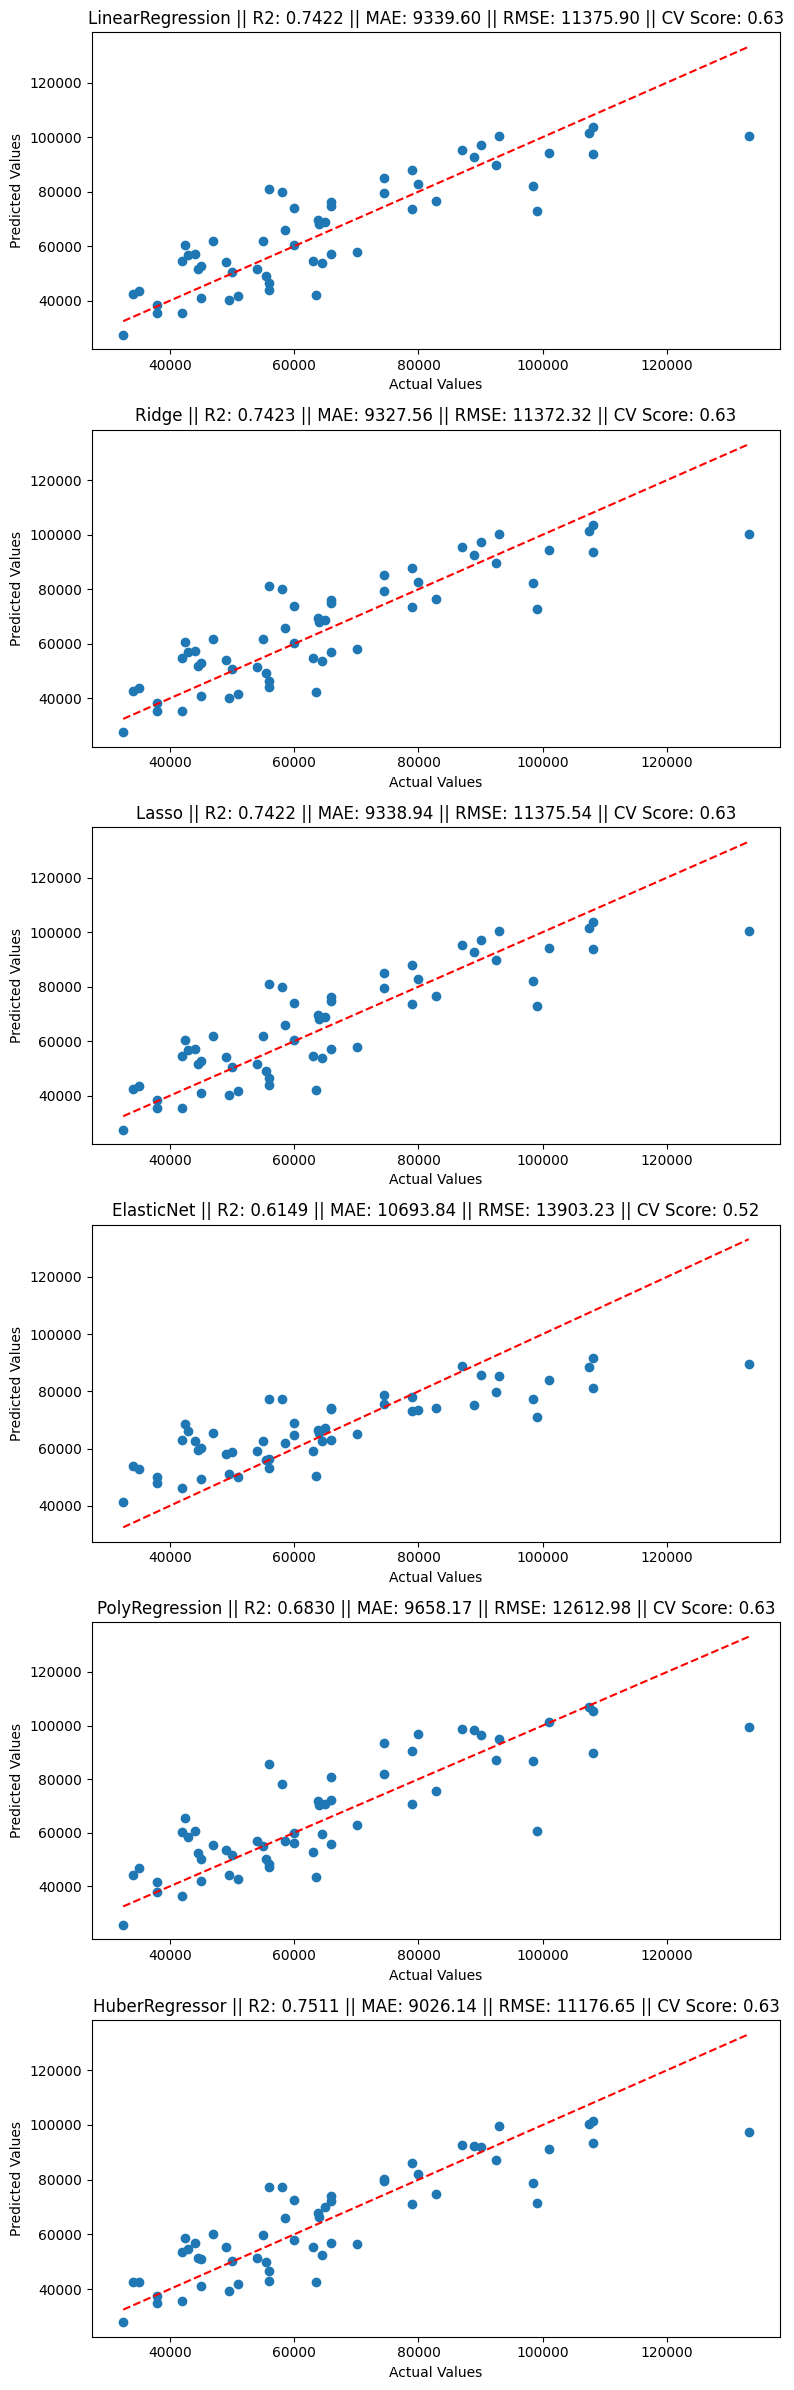

'\nAs we can see from the above, we were able to test our models with various estimators\nAnd we were able to perform various evaluation metrics including Kfold cross validations, with CV score of 0.63, it\'s an indication that our model might need a\nbit of improvemnet\nAnd we were able to plot the residual plot with abline, from all indications, Huber Regressor\nseems like the best performing estimator, with "Huber Regressor", we were able to get the best R-squared value (0.75)\nand the lowest MAE and RMSE values\n\n'

In [230]:
''''
We are testing our models on various linear Regression Estimators, we
will also test on Huber Regressor which is robust to outliers, we will perform
various evalution metrics and including cross validation for our model evaluation

We will plot the predicted vs actual values for each model, we will draw the conclusion from our residual
plots and our evaluation metrics on which is the best performing estimator
'''


Models = [['LinearRegression', LinearRegression()], ['Ridge', Ridge()], ['Lasso', Lasso()], ['ElasticNet', ElasticNet()],  ['PolyRegression',LinearRegression() ], ['HuberRegressor', HuberRegressor()]]
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
# Create figure and axis
#fig, ax = plt.subplots(figsize=(8, 6))
fig, axes = plt.subplots(nrows=len(Models), figsize=(8, 4*len(Models)))

# Iterate over models and plot results
for i, (name, model) in enumerate(Models): # Added enumerate to get a loop counter
  if name == 'PolyRegression':
    model.fit(X_train_poly, y_train_poly)
    y_pred = model.predict(X_test_poly)
    cv_scores = cross_val_score(model,X_train_poly, y_train_poly, cv=kfold, scoring='r2')
  else:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  cv_scores = cross_val_score(model,X_train, y_train, cv=kfold, scoring='r2')
  print(f"{name}")
  print(f" MSE: {mse:.2f}, RMSE:{rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.4f}, CV Score: {cv_scores.mean():.2f}")

  # Create subplot

  plt.subplot(len(Models), 1, i+1)
  # Plot predicted vs actual
  plt.scatter(y_test, y_pred)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
  plt.title(f'{name} || R2: {r2:.4f} || MAE: {mae:.2f} || RMSE: {rmse:.2f} || CV Score: {cv_scores.mean():.2f}' )
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

'''
As we can see from the above, we were able to test our models with various estimators
And we were able to perform various evaluation metrics including Kfold cross validations, with CV score of 0.63, it's an indication that our model might need a
bit of improvemnet
And we were able to plot the residual plot with abline, from all indications, Huber Regressor
seems like the best performing estimator, with "Huber Regressor", we were able to get the best R-squared value (0.75)
and the lowest MAE and RMSE values

'''


**Task 2**: **Perform the following operations:**
 1.	Build the linear regression model by applying hyperparameter tuning using GridSearchCV.
 2.	Display the result of GridSearchCV for linear regression model such as model_name, best_score_ and best_params_


In [231]:
from sklearn.model_selection import GridSearchCV

# Define the models and the parameters for grid search

Models = [['LinearRegression', LinearRegression()], ['Ridge', Ridge()], ['Lasso', Lasso()], ['ElasticNet', ElasticNet()],
['PolyRegression',LinearRegression() ], ['HuberRegressor', HuberRegressor()]]

 # Define parameter grids for each model
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'fit_intercept': [True, False]
    },
    'Lasso': {
        'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'fit_intercept': [True, False]
    },
    'ElasticNet': {
        'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'l1_ratio': [0.2, 0.4, 0.6, 0.8],
        'fit_intercept': [True, False]

    },
   'PolyRegression': {
        'fit_intercept': [True, False]
    },

    'HuberRegressor': {
    'epsilon': [1.0, 1.2, 1.35, 1.5]
    }

}





In [232]:
for name, model in Models:
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    #fit model based on the best model and parrameter
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f".........{name}.........")
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")
    print(f"Best Estimator: {grid_search.best_estimator_}")
    print(f" MSE: {mse}, RMSE:{rmse}, MAE: {mae}, R2: {r2}")


.........LinearRegression.........
Best parameters for LinearRegression: {'fit_intercept': True}
Best score for LinearRegression: -235720623.96942967
Best Estimator: LinearRegression()
 MSE: 129411095.5112927, RMSE:11375.899767108212, MAE: 9339.595587301426, R2: 0.7421505352913373
.........Ridge.........
Best parameters for Ridge: {'alpha': 1.0, 'fit_intercept': True}
Best score for Ridge: -235629510.4213828
Best Estimator: Ridge()
 MSE: 129329723.1251984, RMSE:11372.322679435296, MAE: 9327.559515133975, R2: 0.7423126684230721
.........Lasso.........
Best parameters for Lasso: {'alpha': 1.0, 'fit_intercept': True}
Best score for Lasso: -235720602.73646808
Best Estimator: Lasso()
 MSE: 129402801.07437395, RMSE:11375.53519946969, MAE: 9338.942876371466, R2: 0.7421670618195388
.........ElasticNet.........
Best parameters for ElasticNet: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.8}
Best score for ElasticNet: -235669263.7729084
Best Estimator: ElasticNet(alpha=0.1, l1_ratio=0.8)
 

In [260]:
'''
From the GridSearch, we were able to define our models with the various parameters, and we used the GridSeearch
for our parameter tuning,as we can see from the above result, we were able to generate the best estimator with thier corresponding parameter after tunning.

The result shows that the performance of models like ElasticNet and PolyREgression have been improved with the parameter tunning, but in all, Huber Regressor still proves
to have the best performance, as a result, our best Estimator with the best parameter still remain: ""Best Estimator: HuberRegressor(epsilon=1.5)""

'''


'\nFrom the GridSearch, we were able to define our models with the various parameters, and we used the GridSeearch\nfor our parameter tuning,as we can see from the above result, we were able to generate the best estimator with thier corresponding parameter after tunning.\n\nThe result shows that the performance of models like ElasticNet and PolyREgression have been improved with the parameter tunning, but in all, Huber Regressor still proves\nto have the best performance, as a result, our best Estimator with the best parameter still remain: ""Best Estimator: HuberRegressor(epsilon=1.5)""\n\n'

**Task 3:
•	Analyse the dataset and perform the steps below to build Random Forest Classifier model.**
1.	Data Splitting – Split the data into training and testing datasets.
2.	Build the classification model using training dataset
3.	Make predictions using the built model on test dataset.
4.	Evaluate model using appropriate evaluation metrics. [print confusion matrix and classification report]
•	Add Python comments to explain your code blocks.

In [234]:
#from google.colab import files
#uploaded = files.upload()
data = pd.read_csv('cancer-data-2.csv')

Saving cancer-data-2.csv to cancer-data-2 (2).csv


In [235]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [237]:
data.shape

(569, 31)

In [238]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [239]:
# trying to check if there is blank or null data points
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [240]:
data.duplicated().sum()

0

In [241]:
#Checking the outliers with quantiles Method
List = data.drop('diagnosis', axis = 1).columns.to_list()

for i in List:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # if lower_limit < 0:#Checking the outliers with quantiles


  if lower_limit < 0:
    lower_limit = 0
  data[i] = np.where(data[i] < lower_limit, lower_limit, data[i])
  data[i] = np.where(data[i] > upper_limit, upper_limit, data[i])
  #index_list = data.index[ (data[i] < lower_limit) | (data[i] > upper_limit) ]
  #print(i,np.round(lower_limit,2), np.round(upper_limit,2), len(index_list))

  '''
  I am replacing the outliers with quantiles method as it improves the performance
  of my model by doing so
  '''


In [242]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.062916,19.254736,91.543787,639.765202,0.096266,0.103222,0.086937,0.048552,0.180734,...,16.183882,25.648453,106.705369,849.907821,0.132209,0.249883,0.268754,0.114606,0.287616,0.083342
std,0.483918,3.340025,4.187510,23.047218,305.343508,0.013685,0.049386,0.073900,0.037633,0.026067,...,4.587249,6.054406,31.957777,475.645240,0.022320,0.142851,0.197461,0.065732,0.053868,0.015993
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.057975,0.019380,0.000000,0.000000,0.111200,...,7.930000,12.020000,50.410000,185.200000,0.072500,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,21.900000,30.245000,147.495000,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,...,27.460000,42.680000,187.335000,1937.050000,0.190100,0.626950,0.785500,0.291000,0.419150,0.123010


In [243]:
# we try to run correlation between independent features and our target variable
print(np.abs(data.drop('diagnosis', axis =1).corrwith(data['diagnosis'])).sort_values(ascending= False))

perimeter_worst            0.800618
area_worst                 0.794640
radius_worst               0.793938
concave points_worst       0.793566
concave points_mean        0.788099
perimeter_mean             0.759006
area_mean                  0.752786
radius_mean                0.745217
area_se                    0.739068
concavity_mean             0.727168
concavity_worst            0.683565
perimeter_se               0.646875
radius_se                  0.642399
compactness_worst          0.611083
compactness_mean           0.608494
texture_worst              0.457663
concave points_se          0.450133
smoothness_worst           0.423390
texture_mean               0.419123
symmetry_worst             0.419058
concavity_se               0.398120
smoothness_mean            0.366931
symmetry_mean              0.334536
compactness_se             0.331837
fractal_dimension_worst    0.328719
fractal_dimension_se       0.154061
smoothness_se              0.077796
symmetry_se                0

In [244]:
Selected_Features= np.abs(data.drop('diagnosis', axis =1).corrwith(data['diagnosis'])).sort_values(ascending= False).head(10).index.tolist()
print(Selected_Features)

['perimeter_worst', 'area_worst', 'radius_worst', 'concave points_worst', 'concave points_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'area_se', 'concavity_mean']


In [245]:
#Checking the correlation within the independent variables to eliminate muilti-colinearity

indcorr = data[Selected_Features].corr()

In [246]:
indcorr.style.background_gradient(cmap='coolwarm')

,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,concavity_mean
perimeter_worst,1.000000,0.986301,0.993663,0.823027,0.855906,0.973889,0.967206,0.967506,0.869239,0.739514
area_worst,0.986301,1.000000,0.993198,0.781499,0.830127,0.963900,0.973460,0.962549,0.891669,0.703992
radius_worst,0.993663,0.993198,1.000000,0.794658,0.832188,0.974555,0.973784,0.973472,0.873692,0.702115
concave points_worst,0.823027,0.781499,0.794658,1.000000,0.916542,0.776769,0.739618,0.747817,0.673913,0.881502
concave points_mean,0.855906,0.830127,0.832188,0.916542,1.000000,0.841871,0.814133,0.811833,0.799938,0.928382
perimeter_mean,0.973889,0.963900,0.974555,0.776769,0.841871,1.000000,0.991861,0.997692,0.840760,0.714624
area_mean,0.967206,0.973460,0.973784,0.739618,0.814133,0.991861,1.000000,0.993891,0.857245,0.680126
radius_mean,0.967506,0.962549,0.973472,0.747817,0.811833,0.997692,0.993891,1.000000,0.832692,0.674539
area_se,0.869239,0.891669,0.873692,0.673913,0.799938,0.840760,0.857245,0.832692,1.000000,0.689730
concavity_mean,0.739514,0.703992,0.702115,0.881502,0.928382,0.714624,0.680126,0.674539,0.689730,1.000000


In [247]:
'''
 I'm dropping [ 'perimeter_mean','area_mean','radius_mean', 'radius_worst'] from the selected features because of their high corrrelation with other features, the reason for this is to eliminate
 any multicolinearity among the  independent features
'''

X = data[Selected_Features].drop(['perimeter_mean','area_mean','radius_mean', 'radius_worst'], axis = 1)
y = data['diagnosis']

In [248]:
print(X)

     perimeter_worst  area_worst  concave points_worst  concave points_mean  \
0             184.60     1937.05                0.2654              0.14710   
1             158.80     1937.05                0.1860              0.07017   
2             152.50     1709.00                0.2430              0.12790   
3              98.87      567.70                0.2575              0.10520   
4             152.20     1575.00                0.1625              0.10430   
..               ...         ...                   ...                  ...   
564           166.10     1937.05                0.2216              0.13890   
565           155.00     1731.00                0.1628              0.09791   
566           126.70     1124.00                0.1418              0.05302   
567           184.60     1821.00                0.2650              0.15200   
568            59.16      268.60                0.0000              0.00000   

     area_se  concavity_mean  
0      86.20        

In [249]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_Train.shape, X_Test.shape, y_Train.shape, y_Test.shape)

(455, 6) (114, 6) (455,) (114,)


In [250]:
Scaler= StandardScaler()
X_Train = Scaler.fit_transform(X_Train)
X_Test = Scaler.transform(X_Test)

In [251]:
model = RandomForestClassifier(random_state=10)
model.fit(X_Train, y_Train)

RandomForestClassifier(random_state=10)

In [252]:
'''
We try to perform cross validation to test how our model will perform on the unseen data,
this seems important for me as we have a small sample size data
'''

kfold = KFold(n_splits=5, shuffle=True, random_state=10)
cv_scores = cross_val_score(model,X_Train, y_Train, cv=kfold, scoring='accuracy')

In [253]:
y_Pred = model.predict(X_Test)

In [254]:
print(confusion_matrix(y_Test, y_Pred))
print(classification_report(y_Test, y_Pred))
print(accuracy_score(y_Test, y_Pred))
print(f"Average CV Score: {cv_scores.mean():.2f}")

[[73  2]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

0.9649122807017544
Average CV Score: 0.95


Text(33.22222222222222, 0.5, 'Actual')

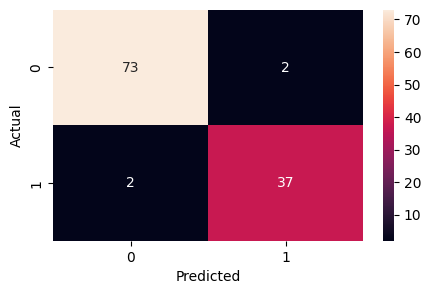

In [255]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(y_Test, y_Pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [256]:
result = pd.DataFrame({'Actual': y_Test, 'Predicted': y_Pred})
result

,Actual,Predicted
172,1,1
553,0,0
374,0,0
370,1,1
419,0,0
...,...,...
188,0,0
429,0,0
399,0,0
323,1,1


**Task 4:
•	Perform the following operations:**
1.	Build Random Forest Classifier classification model by applying hyperparameter tuning using GridSearchCV.
2.	Display the result of GridSearchCV for Random Forest Classifier model such as model_name, best_score_ and best_params_


In [257]:
# GridSearchCV
#Task 4.1: Build Random Forest Classifier classification model by applying hyperparameter tuning using GridSearchCV
model = RandomForestClassifier()
parameters = {'n_estimators':[5,10,15,20,25,30,35,40,45,50],
              'max_depth':[2,4,6,8,10],
              'criterion':['gini','entropy'],
              'random_state': [10]}
grid = GridSearchCV(model, parameters, cv=5, scoring = "accuracy")
grid.fit(X_Train,y_Train)

#Task 4.2: Display the result of GridSearchCV for Random Forest Classifier model such as model_name, best_score_ and best_params_
print("Model Name is: ", grid.estimator)
print("Best Parameter is: ", grid.best_params_)
print("Best Estimator is:", grid.best_estimator_)
print("Best Score is:", grid.best_score_)

Model Name is:  RandomForestClassifier()
Best Parameter is:  {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 45, 'random_state': 10}
Best Estimator is: RandomForestClassifier(max_depth=6, n_estimators=45, random_state=10)
Best Score is: 0.9516483516483516


In [258]:
# By applying Best Parameters from GridSearch

model = RandomForestClassifier(criterion='gini',max_depth=6, n_estimators=45, random_state=10)
model.fit(X_Train, y_Train)
y_pred = model.predict(X_Test)
print(confusion_matrix(y_Test, y_Pred))
print(classification_report(y_Test, y_Pred))
print(accuracy_score(y_Test, y_Pred))

[[73  2]
 [ 2 37]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

0.9649122807017544


Text(33.22222222222222, 0.5, 'Actual')

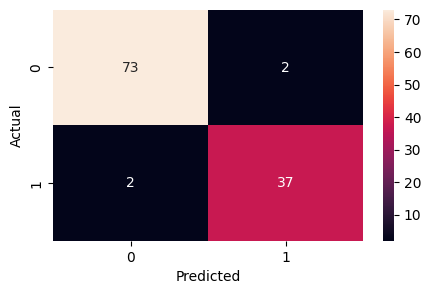

In [259]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(y_Test, y_Pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

The hyperparameter tunning doesn't really have any significant improvement on the performance of our model, I could undertand because the accuracy of our model is as high as 96%, may be tunning might not be neccessary.

In the course of the evaluation, we also perfromed KFOLD Cross valiation to evaluate how our model will perform on unseen data as we have a small sample size data, with the average CVscore of 0.95, this is a very reliable and high performance model.

it noteworthy to mention that we did not select our features based only on correlations with only target varibales but we also put into consideration the correlation among independent features, during this process, 4 out of 10 pre selected features were dropped to avoid multicolinearity and possible overfitting

This brings me to the end of this capstone project, I thank everyone who has helped me on this Journey and I'm looking forward to the next steps and challenges.

Regards,
Oludare Alatise

<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> 1)Task 1 (20 marks)  </h4> 
<h5 style='color:blue'> 
    
<br>---Learner has correctly identified the target variable and the feature sets. </br>
<br>---Learner has split the data into train test data correctly.</br>
<br>---Learner has correctly built the linear regression model using the training data. </br>
<br>---Learner has tested the model on test data too.</br>
<br>---Performance of the model is checked using various evaluation metrics like MAE, MSE, RMSE, and R-Squared score.</br>
<br>---Learner has provided relevant comments at relevant places.</br>
</h5>
<h5 style='color:green'>                                   
    <u> Marks scored:20 </u><br/>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5>    
 
<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> 2)Task 2 (10 marks)  </h4> 
<h5 style='color:blue'>                                                                                
<br>---Learner has provided the code to build model and applied GridSearchCV for hyperparameter tuning. </br>
<br>---Learner has correctly displayed the results. </br>
<br>---Learner has provided relevant comments at relevant places. </br>


                           
<h5 style='color:green'>                                   
<u> Marks scored:10 </u><br/>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5> 
</h5> 

<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> 1)Task 3 (20 marks)  </h4> 
<h5 style='color:blue'> 
<br>---Learner has correctly identified the target variable and the feature sets. </br>
<br>---Learner has split the data into train test data correctly.</br>
<br>---Learner has rightly built the classification model using the training data. </br>
<br>---Learner has tested the model on test data too.</br>
<br>---Learner has also printed the classification report and confusion matrix.</br>
<br>---Learner has provided relevant comments at relevant places.</br>
</h5>
<h5 style='color:green'>                                   
    <u> Marks scored:20 </u><br/>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5>    
 
<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> 2)Task 4 (10 marks)  </h4> 
<h5 style='color:blue'>                                                                                
<br>---Learner has provided the code to build Random Forest classification model and applied GridSearchCV for hyperparameter tuning.</br>
<br>---Correctly displayed the results. </br>
<br>---Learner has provided relevant comments at relevant places. </br>
                           
<h5 style='color:green'>                                   
<u> Marks scored:10 </u><br/>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5> 
</h5> 

    
<h3 style='color:red'> # Comments </h3>
    <h4 style='color:red'> Overall Comments and Total Marks:</h4>
    
<h5 style='color:blue'>                                                                                
---Well-done! Your attention to the details and understanding of the code is much appreciated. You have done a lot more than asked. <br>
---Keep up the good work and keep practicing. Happy coding!  </br>
<h5 style='color:green'>                                   
<u> Total Marks scored:60 </u><br/>
------------------------------------------------------------------------------------------------------------------------------------------------------------------    
</h5> 